In [17]:
%pylab inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import itertools

Populating the interactive namespace from numpy and matplotlib


/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed', 'grid', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


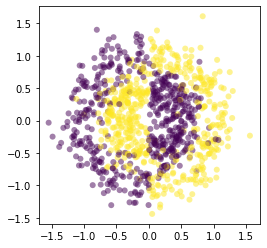

In [18]:
#data set creation
seed = 0;

x,y = datasets.make_circles(n_samples=1000,factor=0.5, noise=.20)

a = x[:,0] > 0
y[a] = np.absolute(y[a]-1)

#plot
plt.subplot(111,aspect='equal'); 
plt.scatter(x[:,0],x[:,1], c = y, alpha=0.5,edgecolor='none'); 

In [8]:
def make_XOR(n_samples=100, cluster_center=[0,0], cluster_std=0.25, dist_from_center=0.5,
             N_XOR=False, theta_rotation=0, random_state=None):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the center of a Gaussian blob distribution)
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        If int, it is the total number of points equally divided among
        the four clusters.
        
    cluster_center : array of shape [2,], optional (default=[0,0])
        The x1 and x2 coordinates of the center of the four clusters.

    cluster_std : float, optional (default=0.25)
        The standard deviation of the clusters.
    
    dist_from_center : float, optional (default=0.5)
        X value distance of each cluster to the center of the four clusters.
        
    N_XOR : boolean, optional (default=False)
        Change to Gaussian N_XOR distribution (inverts the class labels).
        
    theta_rotation : float, optional (default=0)
        Number of radians to rotate the distribution by. 
    
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
      
   
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """
    
    #variable setup
    seed = random_state
    dist = dist_from_center
    std = cluster_std
    n = int(n_samples/4)
    
    cluster_centers = np.array(list(itertools.product([dist, -dist], repeat=2)))
    cluster_centers = cluster_center - cluster_centers
    n_per_cluster = np.full(shape=2, fill_value=n)

    #make blobs
    X1,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[0,3], :], 
                               cluster_std=std, random_state=seed)
    X2,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[1,2], :], 
                               cluster_std=std, random_state=seed)
    
    #assign classe
    if N_XOR:
        y1, y2 = np.zeros(n*2), np.ones(n*2)
    else:
        y1, y2 = np.ones(n*2), np.zeros(n*2)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, y2))

    #rotation
    c, s = np.cos(theta_rotation), np.sin(theta_rotation)
    R = np.array([[c, -s], [s, c]])
    X = (R @ X.T).T
    
    return X,y

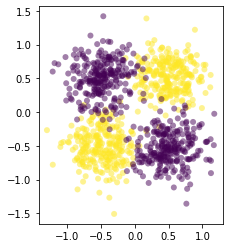

In [14]:
x,y = make_XOR(1000)

#plot
plt.subplot(111,aspect='equal'); 
plt.scatter(x[:,0],x[:,1], c = y, alpha=0.5,edgecolor='none'); 

/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


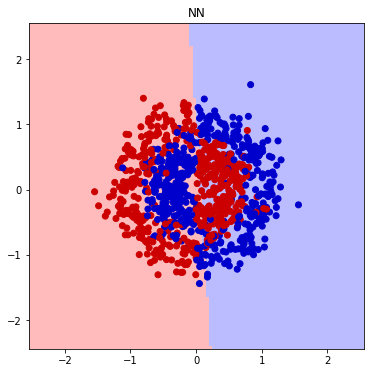

In [19]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

#Grid Setup
h = 0.05 # grid step size
X = x.copy()
Y = y.copy()
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # grid has x value from x_min to x_max
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1 # grid has y value from y_min to y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()] # ravel: put all entried of matrix into a flattened vector

clf =  MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=2000, random_state=seed) # create classifier object

ZZ = clf.fit(X,Y).predict(grid) # predicting on the grid
ZZ = ZZ.reshape(xx.shape) # reshaping

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light);
    
# Plot the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());
plt.title('NN');

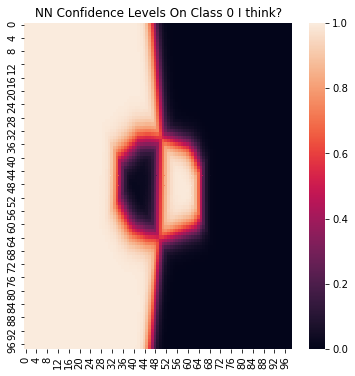

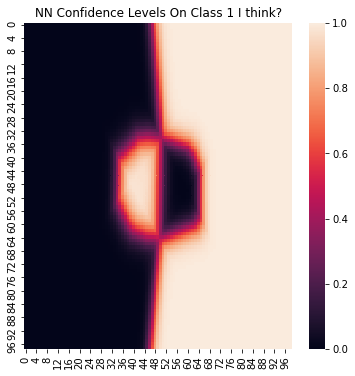

In [5]:
import seaborn as sns

# plot NN confidence levels

AA = clf.predict_proba(grid)
BB = AA[:,0]
CC = AA[:,1]
BB = BB.reshape(xx.shape)
CC = CC.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.title('NN Confidence Levels On Class 0 I think?');
ax1 = sns.heatmap(BB)

plt.figure(figsize=(6,6));
plt.title('NN Confidence Levels On Class 1 I think?');
ax2 = sns.heatmap(CC)


/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


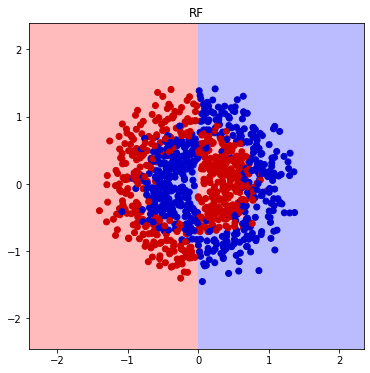

In [7]:
#Grid Setup
h = 0.05 # grid step size
X = x.copy()
Y = y.copy()
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # grid has x value from x_min to x_max
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1 # grid has y value from y_min to y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()] # ravel: put all entried of matrix into a flattened vector

clf =  RandomForestClassifier(max_depth=10, random_state=seed) # create classifier object

ZZ = clf.fit(X,Y).predict(grid) # predicting on the grid
ZZ = ZZ.reshape(xx.shape) # reshaping

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light);
    
# Plot the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());
plt.title('RF');

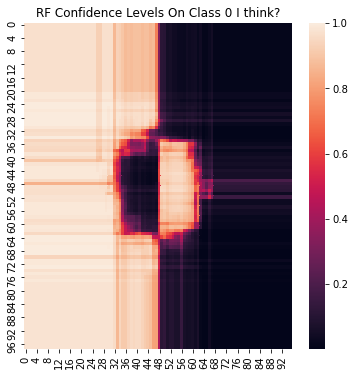

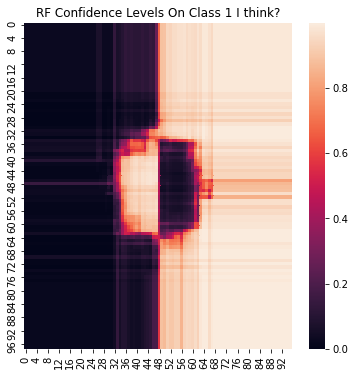

In [9]:
# plot NN confidence levels

AA = clf.predict_proba(grid)
BB = AA[:,0]
CC = AA[:,1]
BB = BB.reshape(xx.shape)
CC = CC.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.title('RF Confidence Levels On Class 0 I think?');
ax1 = sns.heatmap(BB)

plt.figure(figsize=(6,6));
plt.title('RF Confidence Levels On Class 1 I think?');
ax2 = sns.heatmap(CC)